# Objectives

- Use Linear Regression in one variable to fit the parameters to a model
 - Use Linear Regression in multiple variables to fit the parameters to a model
 - Use Polynomial Regression in single variable tofit the parameters to a model
 - Create a pipeline for performing linear regression using multiple features in polynomial scaling
 - Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


In [2]:
filepath = "https://drive.google.com/uc?export=download&id=1eqztnFwnHZgXSpQuNqzF9rjFfi4MsbR9"
df = pd.read_csv(filepath)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      238 non-null    int64  
 1   Unnamed: 0        238 non-null    int64  
 2   Manufacturer      238 non-null    object 
 3   Category          238 non-null    int64  
 4   GPU               238 non-null    int64  
 5   OS                238 non-null    int64  
 6   CPU_core          238 non-null    int64  
 7   Screen_Size_inch  238 non-null    float64
 8   CPU_frequency     238 non-null    float64
 9   RAM_GB            238 non-null    int64  
 10  Storage_GB_SSD    238 non-null    int64  
 11  Weight_pounds     238 non-null    float64
 12  Price             238 non-null    int64  
 13  Price-binned      238 non-null    object 
 14  Screen-Full_HD    238 non-null    int64  
 15  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(11), object(2)
memory u

In [3]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Simple Linear Regression

"CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [15]:
lm = LinearRegression()
X = df[['CPU_frequency']]
y = df[['Price']]
lm.fit(X, y)

yhat = lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values.

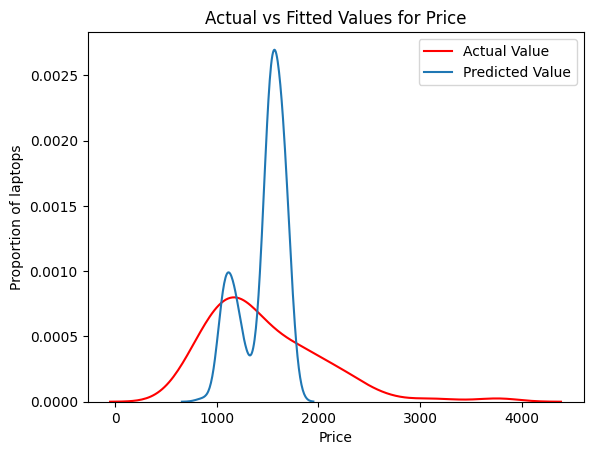

In [16]:

sns.kdeplot(df['Price'], color='r', label='Actual Value') # type: ignore
sns.kdeplot(yhat, color='b', label='Fitted Values')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])

plt.show()



Evaluating the MSE and R2 score values of the model

In [17]:
mean_slr = mean_squared_error(df['Price'], yhat)
r2_score_slr = lm.score(X, y)
print(mean_slr, r2_score_slr)

284583.4405868629 0.1344436321024326


# Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. 

In [18]:
lm = LinearRegression()
X = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']]
y = df[['Price']]
lm.fit(X, y)

yhat = lm.predict(X)

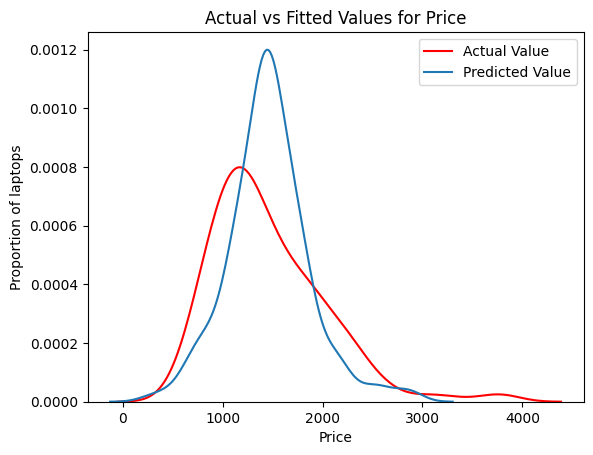

In [19]:

sns.kdeplot(df['Price'], color='r', label='Actual Value') # type: ignore
sns.kdeplot(yhat, color='b', label='Fitted Values')

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])

plt.show()

Evaluating the MSE and R2 score values of the model

In [20]:
mlr_mse = mean_squared_error(df['Price'], yhat)
r2 = lm.score(X, y)

print(mlr_mse, r2)

161680.57263893104 0.5082509055187376


# Polynomial Regression
"CPU_frequency" to create Polynomial features. 3 different values of polynomial degrees.

In [21]:
X = df['CPU_frequency']
y = df['Price']
X = X.to_numpy().flatten()
f1 = np.polyfit(X, y, 1)
f3 = np.polyfit(X, y, 3)
f5 = np.polyfit(X, y, 5)

p1 = np.poly1d(f1)
p3 = np.poly1d(f3)
p5 = np.poly1d(f5)

Plot the regression output against the actual data points to note how the data fits in each case.

In [22]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

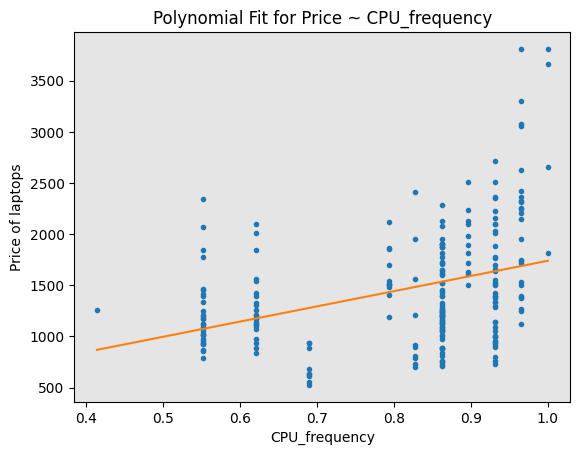

In [23]:
# Call for function of degree 1
PlotPolly(p1, X, y, 'CPU_frequency')

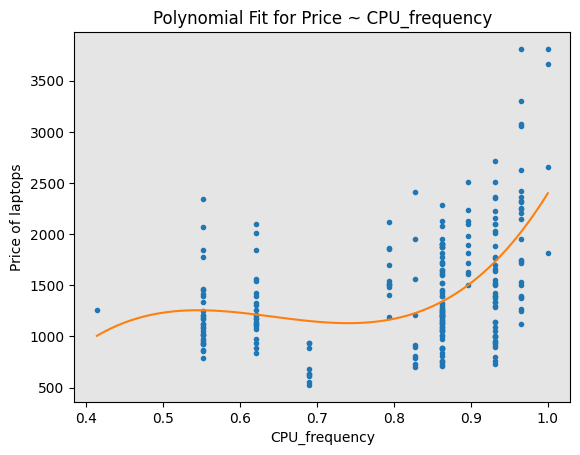

In [24]:
# Call for function of degree 3
PlotPolly(p3, X, y, 'CPU_frequency')

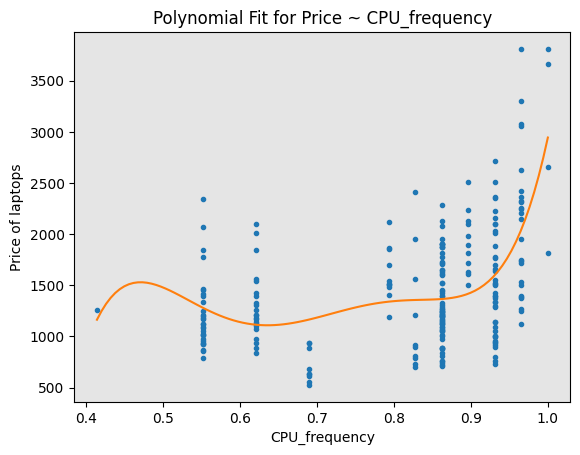

In [25]:
# Call for function of degree 5
PlotPolly(p5, X, y, 'CPU_frequency')

Find R^2 and MSE values for these fits. For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.

In [26]:
r_squared_1 = r2_score(y, p1(X))
r_squared_3 = r2_score(y, p3(X))
r_squared_5 = r2_score(y, p5(X))
print("1")
print(r_squared_1, mean_squared_error(y, p1(X)))
print("-----------")
print("3")
print(r_squared_3, mean_squared_error(y, p3(X)))
print("-----------")
print("5")
print(r_squared_5, mean_squared_error(y, p5(X)))
print("-----------")

1
0.1344436321024326 284583.4405868629
-----------
3
0.2669264079653113 241024.86303848765
-----------
5
0.3030822706443915 229137.29548053455
-----------


# Pipeline
Creating a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Input = [('scale', StandardScaler()), 
         ('polynomial', PolynomialFeatures(include_bias=False)), 
         ('model', LinearRegression())]
pipe = Pipeline(Input)

Z = Z.reshape(-1, 1)  # Приводим Z к двумерному виду
y = y.reshape(-1,)    # Убедимся, что y имеет правильную форму

pipe.fit(Z, y)
ypipe = pipe.predict(Z)


In [33]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(y, ypipe))

MSE for multi-variable polynomial pipeline is:  249022.6659675117
R^2 for multi-variable polynomial pipeline is:  0.24260120745423774
